<a href="https://colab.research.google.com/github/Ishakasar/Taxi-Trip-Prediction/blob/main/Isha_Kasar_Team_3_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

In [349]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary df is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [350]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [351]:
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/NYC Taxi Data.csv')

In [352]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [354]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [355]:
df['trip_duration'].value_counts()

368      1624
408      1584
348      1582
367      1581
358      1577
         ... 
85305       1
83256       1
83884       1
6419        1
8522        1
Name: trip_duration, Length: 7417, dtype: int64

In [356]:
df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [357]:
df['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [358]:
df[df.duplicated()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


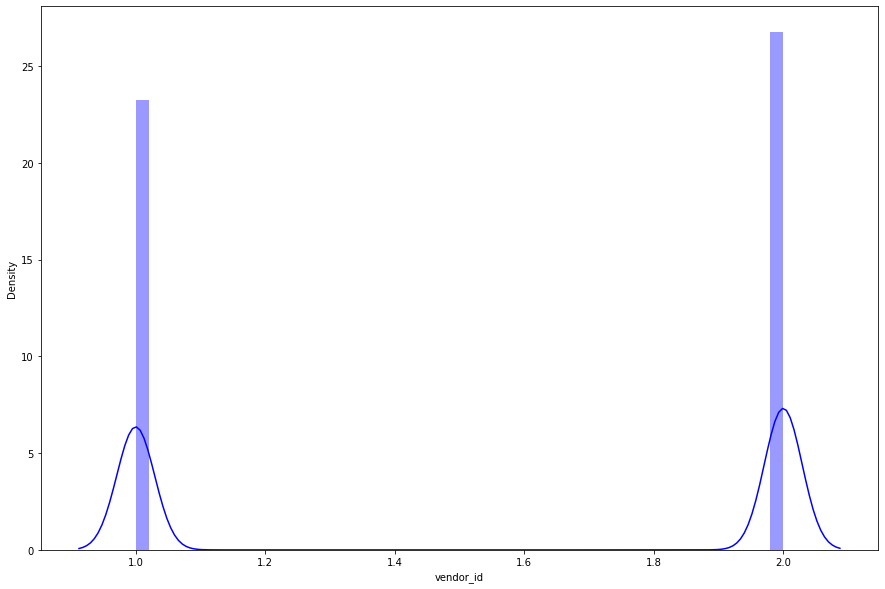

In [359]:
plt.figure(figsize=(15,10))
sns.distplot(df['vendor_id'	],color="B")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


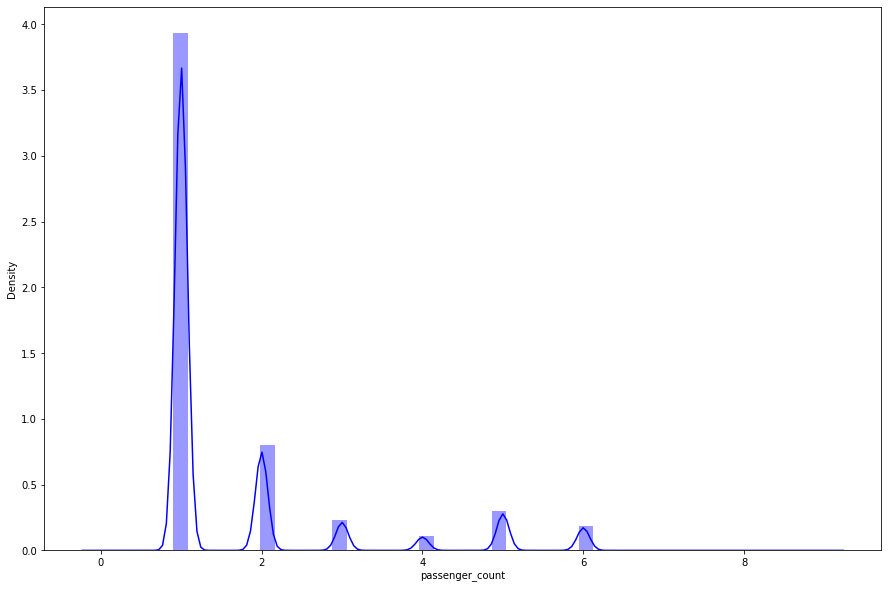

In [360]:
plt.figure(figsize=(15,10))
sns.distplot(df['passenger_count'	],color="B")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


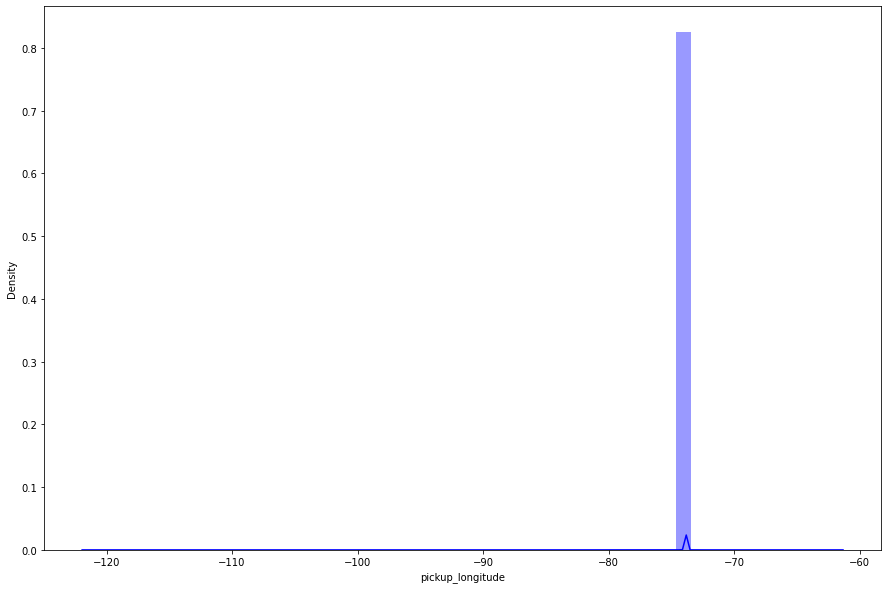

In [361]:
plt.figure(figsize=(15,10))
sns.distplot(df['pickup_longitude'	],color="B")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


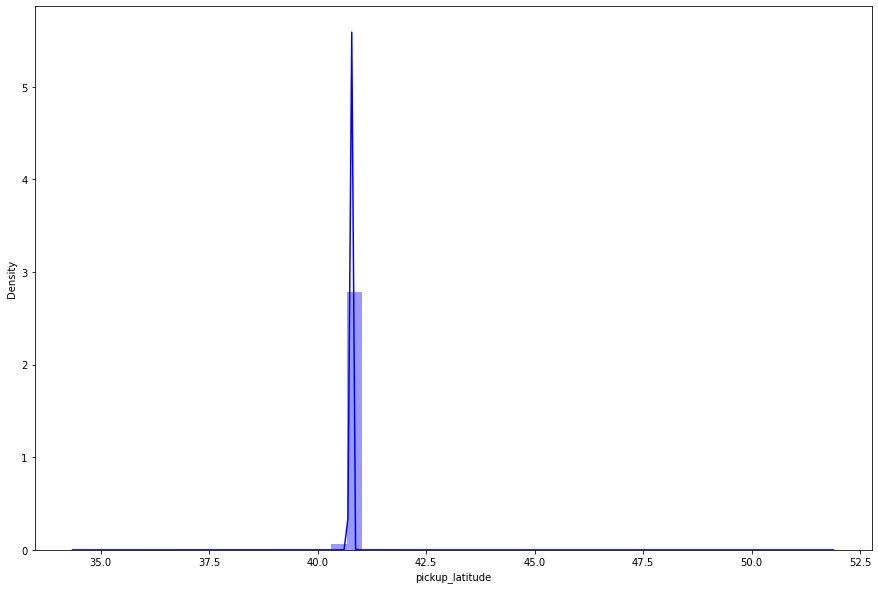

In [362]:
plt.figure(figsize=(15,10))
sns.distplot(df['pickup_latitude'	],color="B")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


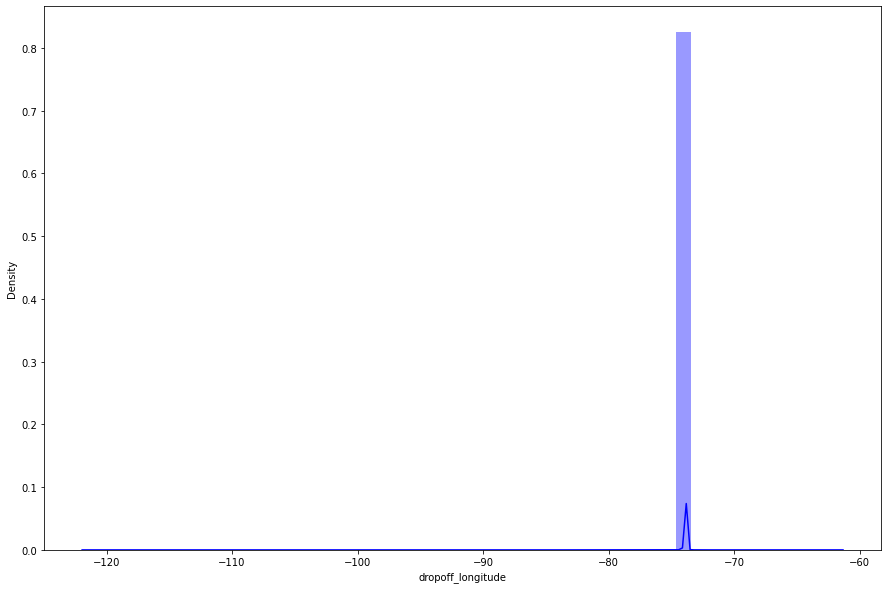

In [363]:
plt.figure(figsize=(15,10))
sns.distplot(df['dropoff_longitude'	],color="B")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


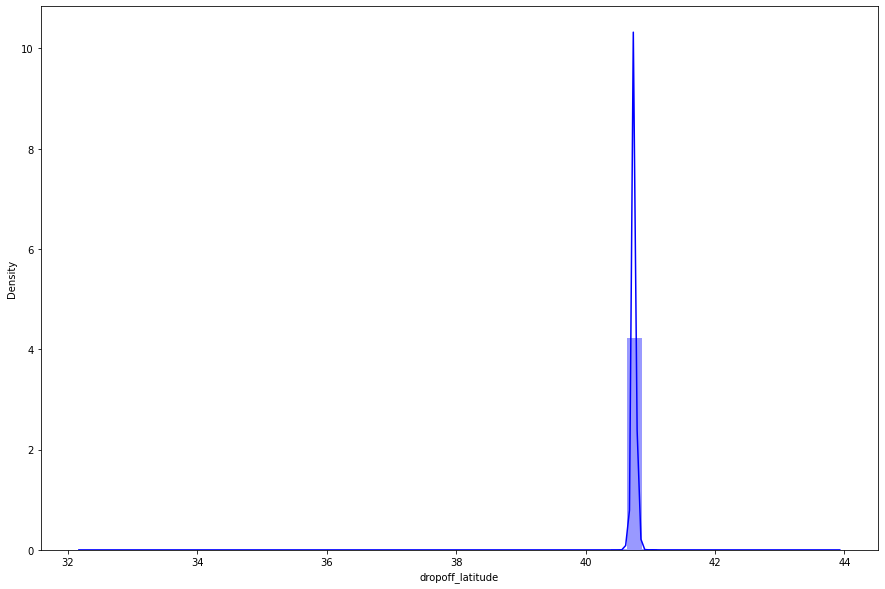

In [364]:
plt.figure(figsize=(15,10))
sns.distplot(df['dropoff_latitude'	],color="B")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


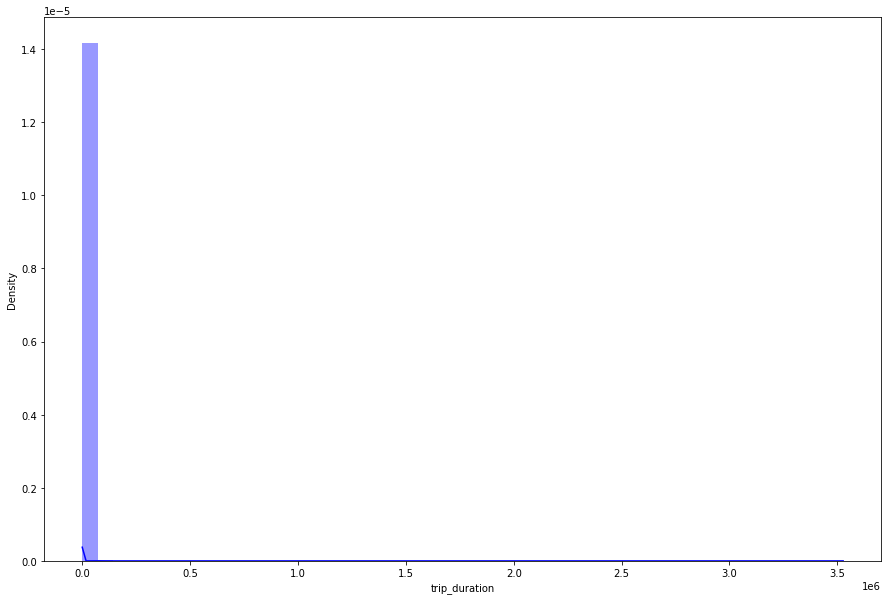

In [365]:
plt.figure(figsize=(15,10))
sns.distplot(df['trip_duration'	],color="B")

##Making new features

In [366]:
from math import sin, cos, sqrt, atan2, radians

def get_distance(lon_1, lon_2, lat_1, lat_2):

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat_1)
    lon1 = radians(lon_1)
    lat2 = radians(lat_2)
    lon2 = radians(lon_2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [367]:
df["Travel_distance"] = df.apply(lambda x: get_distance(x["pickup_longitude"],x["dropoff_longitude"],x["pickup_latitude"],x["dropoff_latitude"]),axis=1)

In [368]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], format="%Y-%m-%d %H:%M:%S")

In [369]:
df['Day']=df['pickup_datetime'].dt.day_name()

In [370]:
df["year"] = df["pickup_datetime"].apply(lambda x: x.year)
df["month"] = df["pickup_datetime"].apply(lambda x: x.month)
df["day_num"] = df["pickup_datetime"].apply(lambda x: x.day)
df["hour"] = df["pickup_datetime"].apply(lambda x: x.hour)
df["minute"] = df["pickup_datetime"].apply(lambda x: x.minute)

In [371]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Travel_distance,Day,year,month,day_num,hour,minute
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,Monday,2016,3,14,17,24
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,Sunday,2016,6,12,0,43
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103,Tuesday,2016,1,19,11,35
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,Wednesday,2016,4,6,19,32
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,Saturday,2016,3,26,13,30


In [372]:
df['month'].value_counts()

3    256189
4    251645
5    248487
2    238300
6    234316
1    229707
Name: month, dtype: int64

In [373]:
df['hour'].value_counts()

18    90600
19    90308
21    84185
20    84072
22    80492
17    76483
14    74292
12    71873
15    71811
13    71473
23    69785
11    68476
9     67663
8     67053
10    65437
16    64313
7     55600
0     53248
1     38571
6     33248
2     27972
3     20895
4     15792
5     15002
Name: hour, dtype: int64

In [374]:
df['minute'].value_counts()

48    25235
45    25094
50    25057
54    24803
52    24801
42    24791
49    24755
46    24750
47    24621
44    24620
37    24541
17    24531
56    24528
21    24522
6     24519
51    24489
14    24458
18    24455
53    24453
11    24453
20    24449
9     24400
19    24397
8     24394
57    24394
12    24380
40    24379
16    24359
43    24354
41    24300
13    24278
38    24273
22    24273
10    24239
32    24233
3     24198
55    24176
5     24135
2     24091
35    24090
4     24076
33    24069
39    24062
26    24057
31    24054
34    24053
36    24044
29    24010
15    24002
58    23999
23    23975
27    23953
7     23949
30    23945
1     23927
59    23914
24    23913
28    23840
0     23788
25    23746
Name: minute, dtype: int64

In [375]:
df['Day'].value_counts()

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: Day, dtype: int64

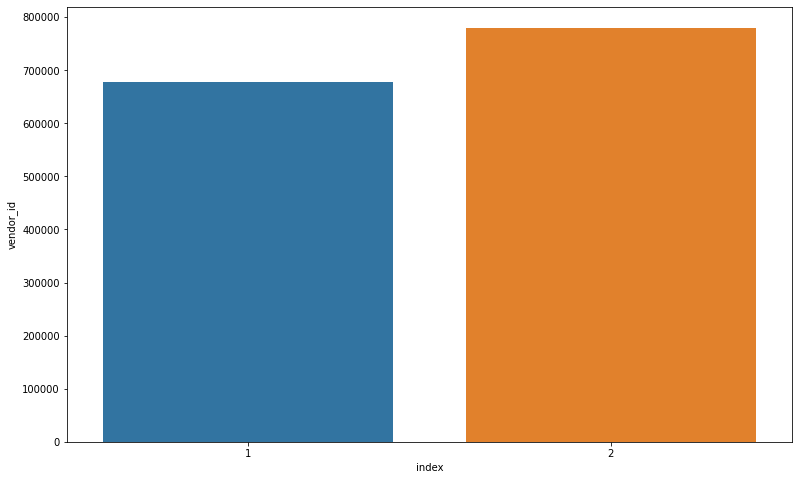

In [376]:
vendor_df=df['vendor_id'].value_counts().reset_index()
plt.figure(figsize=(13,8))
sns.barplot(x='index',y='vendor_id',data=vendor_df)

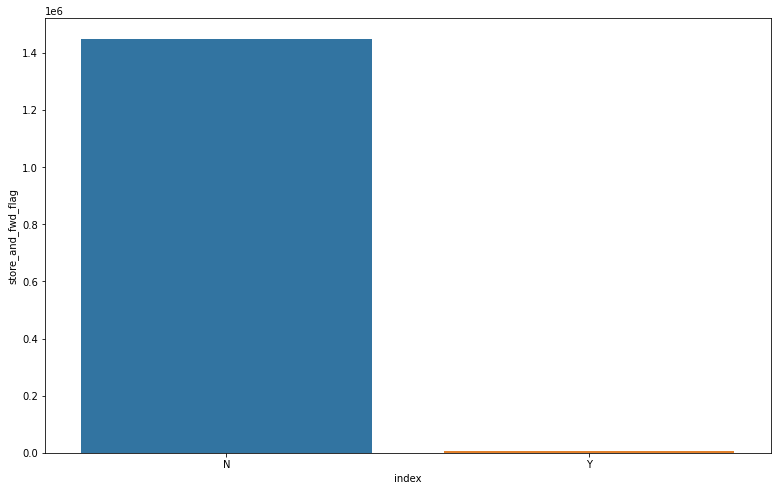

In [377]:
store_and_fwd_flag_df=df['store_and_fwd_flag'].value_counts().reset_index()
plt.figure(figsize=(13,8))
sns.barplot(x='index',y='store_and_fwd_flag',data=store_and_fwd_flag_df)

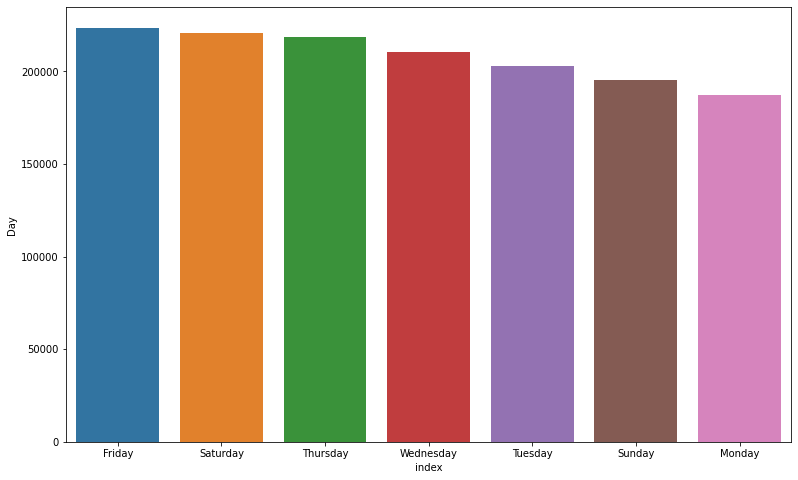

In [378]:
Day_df=df['Day'].value_counts().reset_index()
plt.figure(figsize=(13,8))
sns.barplot(x='index',y='Day',data=Day_df)

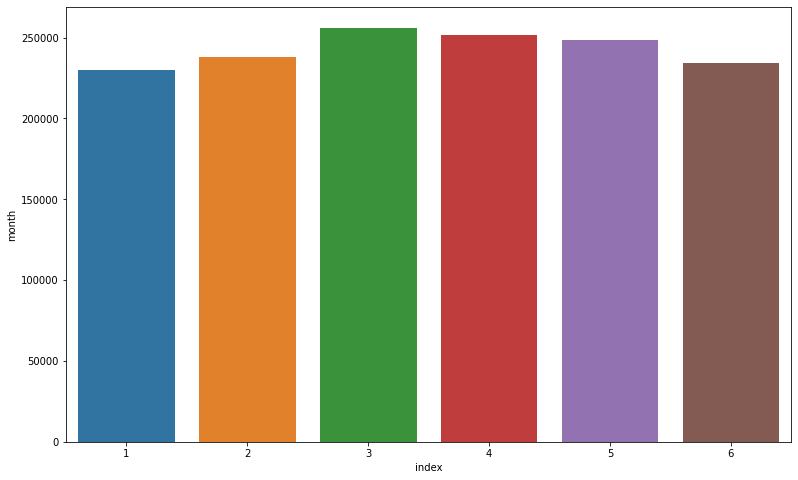

In [379]:
month_df=df['month'].value_counts().reset_index()
plt.figure(figsize=(13,8))
sns.barplot(x='index',y='month',data=month_df)

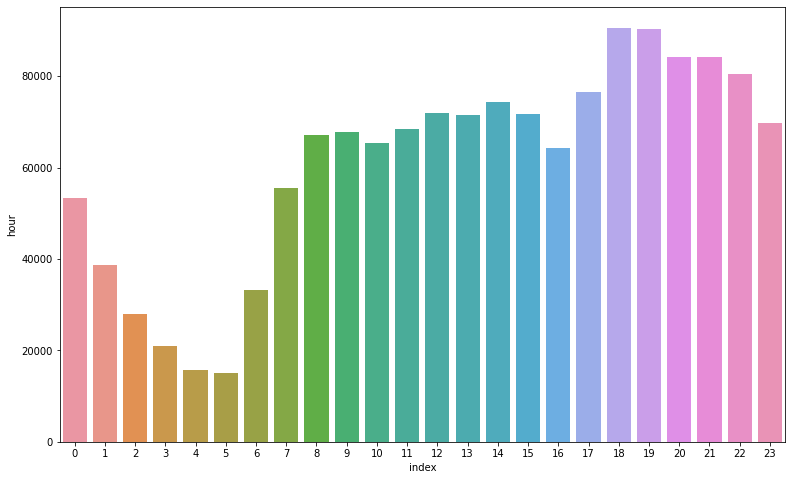

In [380]:
hour_df=df['hour'].value_counts().reset_index()
plt.figure(figsize=(13,8))
sns.barplot(x='index',y='hour',data=hour_df)

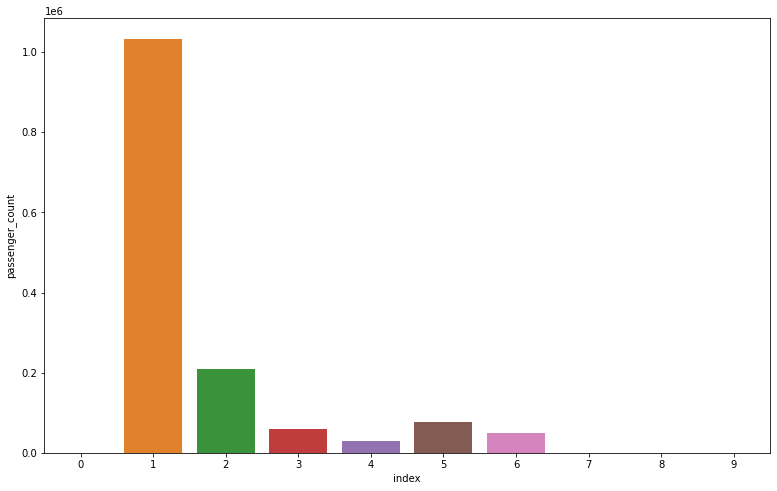

In [381]:
passenger_count_df=df['passenger_count'].value_counts().reset_index()
plt.figure(figsize=(13,8))
sns.barplot(x='index',y='passenger_count',data=passenger_count_df)

In [382]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'Travel_distance', 'Day', 'year', 'month', 'day_num',
       'hour', 'minute'],
      dtype='object')

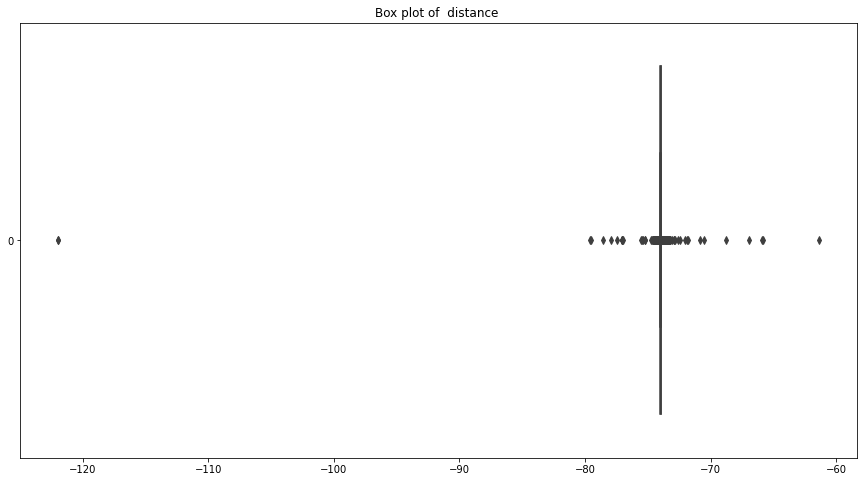

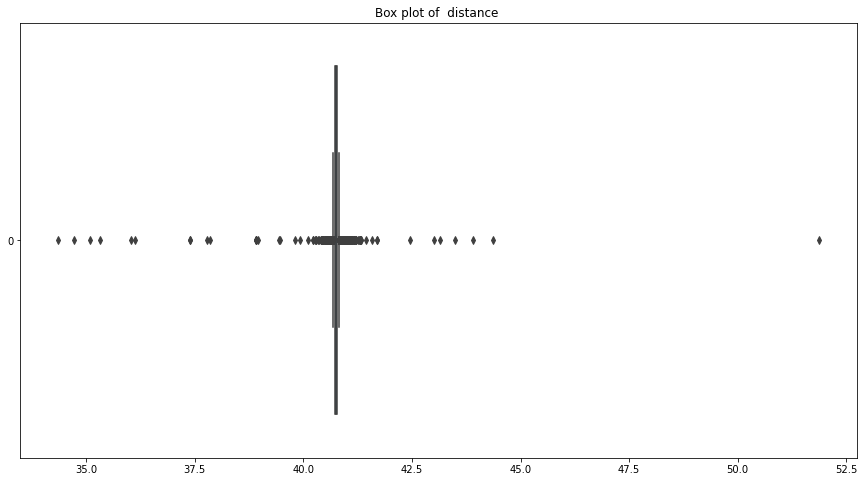

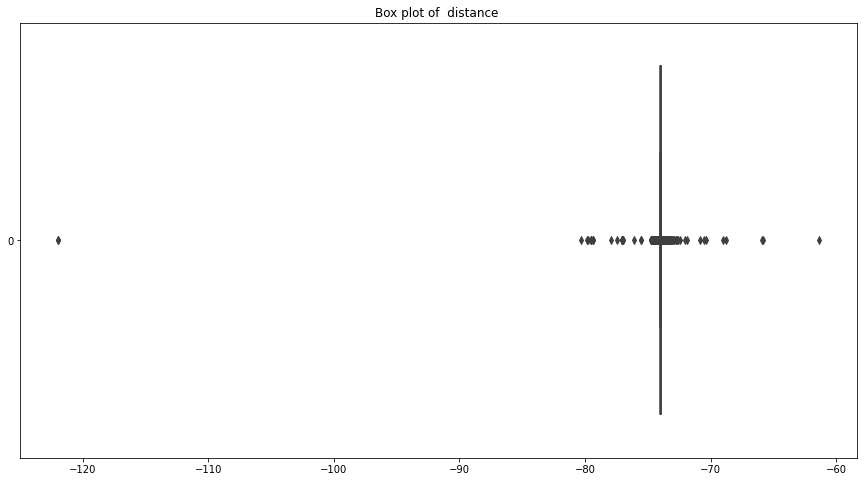

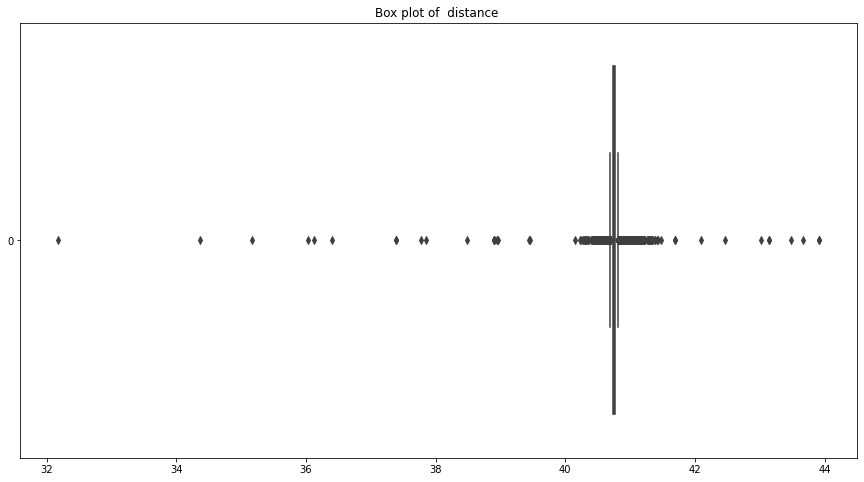

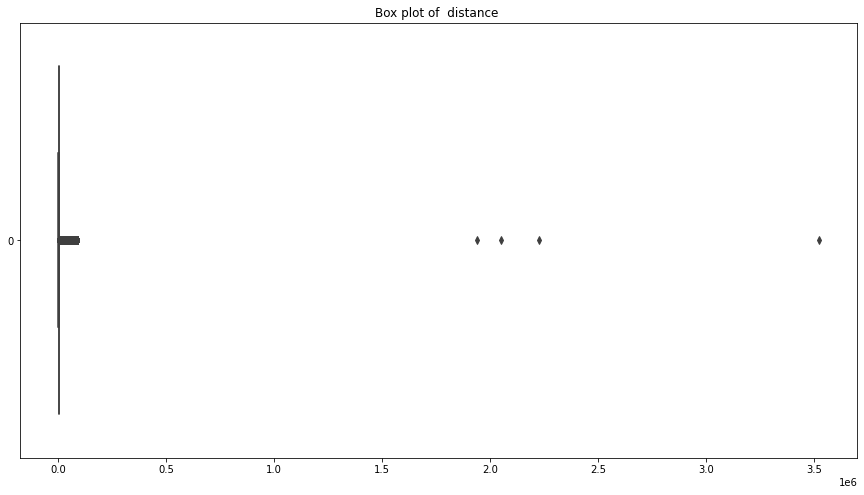

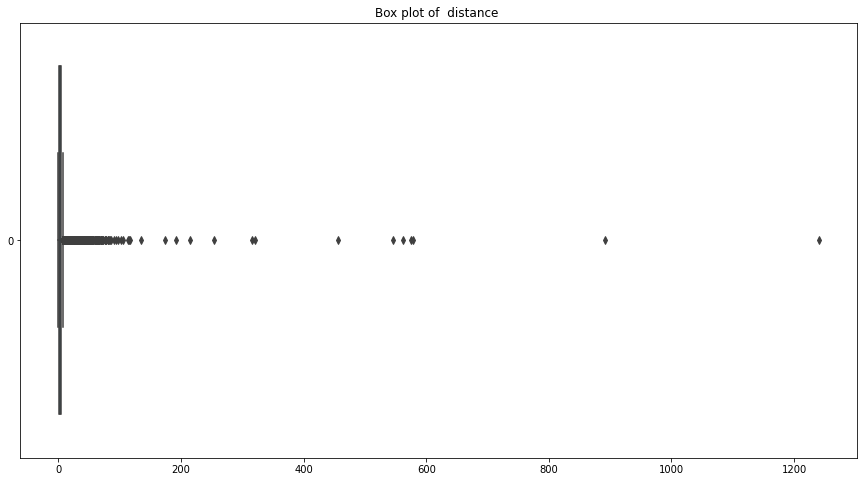

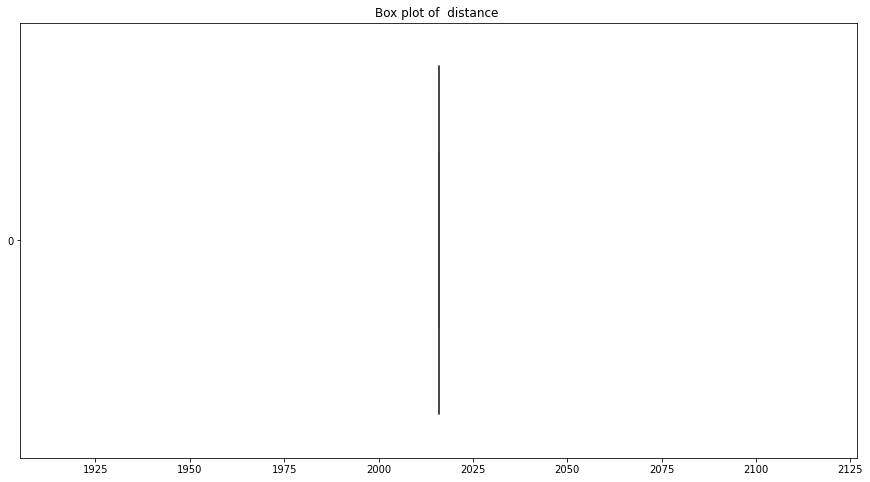

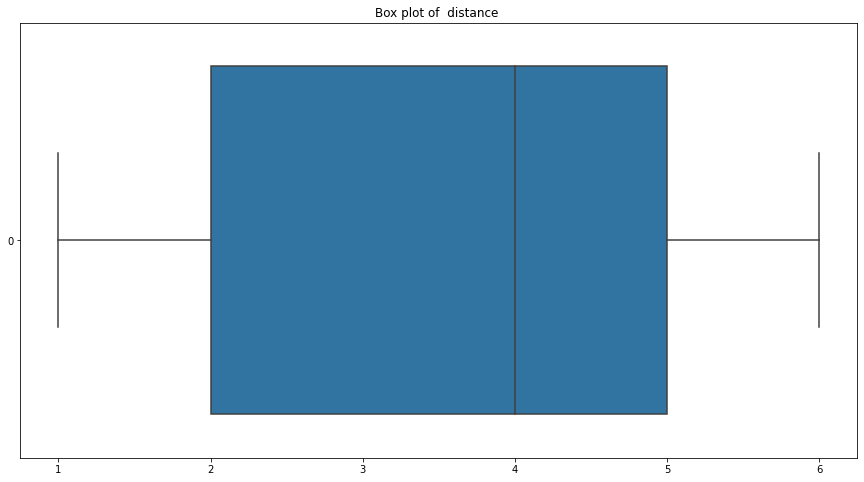

In [383]:
box_df = pd.DataFrame(data = df, columns = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude',
       'trip_duration', 'Travel_distance', 'year', 'month', 
       ])
for col in box_df.columns:
  plt.figure(figsize=(15,8))
  plt.title("Box plot of  distance ")
  ax = sns.boxplot(data=box_df[col],orient='h')


In [384]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,Travel_distance,year,month,day_num,hour,minute
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644.0,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,3.441944e+00,2016.0,3.516818e+00,1.550402e+01,1.360648e+01,2.959016e+01
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,4.297887e+00,0.0,1.681038e+00,8.703135e+00,6.399693e+00,1.732471e+01
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00,2016.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,1.232223e+00,2016.0,2.000000e+00,8.000000e+00,9.000000e+00,1.500000e+01
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,2.094374e+00,2016.0,4.000000e+00,1.500000e+01,1.400000e+01,3.000000e+01
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,3.876554e+00,2016.0,5.000000e+00,2.300000e+01,1.900000e+01,4.500000e+01
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,1.241298e+03,2016.0,6.000000e+00,3.100000e+01,2.300000e+01,5.900000e+01


In [385]:
col_list=['trip_duration', 'Travel_distance']
for col in col_list:
  print(f'{col}:')
  print(df[col].max())

trip_duration:
3526282
Travel_distance:
1241.2982257566919


#Remove outliers based on trip duration and travel distance

In [386]:
'''Q1 = np.percentile(df['Travel_distance'],25)
print(Q1)
Q3= np.percentile(df['Travel_distance'],75)
print(Q3)
IQR=Q3 - Q1
'''

"Q1 = np.percentile(df['Travel_distance'],25)\nprint(Q1)\nQ3= np.percentile(df['Travel_distance'],75)\nprint(Q3)\nIQR=Q3 - Q1\n"

In [387]:
'''L=Q1-1.5*IQR
U=Q3+1.5*IQR
'''

'L=Q1-1.5*IQR\nU=Q3+1.5*IQR\n'

In [388]:
#df=df[(df['Travel_distance']<U) & (df['Travel_distance']>L)]

In [389]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,Travel_distance,year,month,day_num,hour,minute
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644.0,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,3.441944e+00,2016.0,3.516818e+00,1.550402e+01,1.360648e+01,2.959016e+01
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,4.297887e+00,0.0,1.681038e+00,8.703135e+00,6.399693e+00,1.732471e+01
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00,2016.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,1.232223e+00,2016.0,2.000000e+00,8.000000e+00,9.000000e+00,1.500000e+01
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,2.094374e+00,2016.0,4.000000e+00,1.500000e+01,1.400000e+01,3.000000e+01
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,3.876554e+00,2016.0,5.000000e+00,2.300000e+01,1.900000e+01,4.500000e+01
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,1.241298e+03,2016.0,6.000000e+00,3.100000e+01,2.300000e+01,5.900000e+01


In [390]:
df.shape

(1458644, 18)

#Travel dist 0 means no trip

In [391]:
df[df['Travel_distance']<=0.5]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Travel_distance,Day,year,month,day_num,hour,minute
72,id1510700,2,2016-02-20 21:58:13,2016-02-20 21:59:10,1,-73.958397,40.772629,-73.955132,40.774242,N,57,0.328436,Saturday,2016,2,20,21,58
127,id2209089,1,2016-02-24 22:56:43,2016-02-24 23:03:39,1,-74.006912,40.730362,-74.005943,40.727070,N,416,0.375175,Wednesday,2016,2,24,22,56
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,227,0.000000,Monday,2016,2,29,18,39
251,id0171820,2,2016-05-25 06:40:04,2016-05-25 06:43:13,1,-74.004524,40.724194,-74.004494,40.724667,N,189,0.052677,Wednesday,2016,5,25,6,40
269,id0747713,2,2016-01-17 03:24:53,2016-01-17 03:27:29,1,-74.006691,40.737640,-74.003883,40.738091,N,156,0.241863,Sunday,2016,1,17,3,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458438,id2559393,1,2016-05-28 21:37:09,2016-05-28 21:40:48,1,-73.969505,40.757195,-73.965706,40.754257,N,219,0.457412,Saturday,2016,5,28,21,37
1458539,id3985942,1,2016-06-03 07:41:14,2016-06-03 07:44:01,1,-73.957047,40.774696,-73.959740,40.778294,N,167,0.459954,Friday,2016,6,3,7,41
1458544,id3958653,1,2016-06-16 15:10:11,2016-06-16 15:10:49,1,-73.956459,40.767231,-73.956589,40.767269,N,38,0.011721,Thursday,2016,6,16,15,10
1458551,id3517858,1,2016-05-10 07:13:21,2016-05-10 07:16:26,1,-73.975151,40.752602,-73.971947,40.754333,N,185,0.331672,Tuesday,2016,5,10,7,13


In [392]:
df.drop(df.loc[df['Travel_distance']<=0.5].index, inplace=True)


In [393]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'Travel_distance', 'Day', 'year', 'month', 'day_num',
       'hour', 'minute'],
      dtype='object')

In [394]:
df['hour'].astype(int)

0          17
1           0
2          11
3          19
4          13
           ..
1458639    13
1458640     7
1458641     6
1458642    15
1458643    14
Name: hour, Length: 1409782, dtype: int64

In [395]:
def rush_hour(hour):
    if hour.item()>=7 and hour.item()<=9:
        return 'rush_hour_morning(7-9)'
    elif hour.item()>9 and hour.item()<16:
        return 'normal_hour_afternoon(9-16)'
    elif hour.item()>=16 and hour.item()<=19:
        return 'rush_hour_evening(16-19)'
    elif hour.item()>19 and hour.item()<=23:
        return 'normal_hour_evining(19-23)'
    else:
        return 'latenight(23 onwards)'
df['Rush_hour']=df[['hour']].apply(rush_hour, axis=1)

In [396]:
df = pd.get_dummies(df, columns=["Rush_hour"])

In [397]:
df.head(15)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Travel_distance,Day,year,month,day_num,hour,minute,Rush_hour_latenight(23 onwards),Rush_hour_normal_hour_afternoon(9-16),Rush_hour_normal_hour_evining(19-23),Rush_hour_rush_hour_evening(16-19),Rush_hour_rush_hour_morning(7-9)
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,Monday,2016,3,14,17,24,0,0,0,1,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,Sunday,2016,6,12,0,43,1,0,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103,Tuesday,2016,1,19,11,35,0,1,0,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,Wednesday,2016,4,6,19,32,0,0,0,1,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,Saturday,2016,3,26,13,30,0,1,0,0,0
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,1.099287,Saturday,2016,1,30,22,1,0,0,1,0,0
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,1.326695,Friday,2016,6,17,22,34,0,0,1,0,0
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,5.716775,Saturday,2016,5,21,7,54,0,0,0,0,1
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,1.310765,Friday,2016,5,27,23,12,0,0,1,0,0
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,5.122769,Thursday,2016,3,10,21,45,0,0,1,0,0


it is unlikely for people to take trips for less than 5 min and more than 8 hrs(longest trip across nyc acc to google maps is 7 hrs) so we can keep records upto 10 hrs.

In [398]:
#convert trip duration to hrs
df['trip_duration']=df['trip_duration']/3600

In [399]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Travel_distance,Day,year,month,day_num,hour,minute,Rush_hour_latenight(23 onwards),Rush_hour_normal_hour_afternoon(9-16),Rush_hour_normal_hour_evining(19-23),Rush_hour_rush_hour_evening(16-19),Rush_hour_rush_hour_morning(7-9)
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,0.126389,1.498991,Monday,2016,3,14,17,24,0,0,0,1,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,0.184167,1.806074,Sunday,2016,6,12,0,43,1,0,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,0.590000,6.387103,Tuesday,2016,1,19,11,35,0,1,0,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,0.119167,1.485965,Wednesday,2016,4,6,19,32,0,0,0,1,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,0.120833,1.188962,Saturday,2016,3,26,13,30,0,1,0,0,0


In [400]:
df.shape

(1409782, 23)

In [401]:
df.drop(df.loc[df['trip_duration']<=00.84].index, inplace=True)
df.drop(df.loc[df['trip_duration']>=10].index, inplace=True)


In [402]:
df.shape

(20912, 23)

In [403]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Travel_distance,Day,year,month,day_num,hour,minute,Rush_hour_latenight(23 onwards),Rush_hour_normal_hour_afternoon(9-16),Rush_hour_normal_hour_evining(19-23),Rush_hour_rush_hour_evening(16-19),Rush_hour_rush_hour_morning(7-9)
55,id3827863,2,2016-04-19 11:29:08,2016-04-19 12:27:56,3,-73.792892,40.657879,-73.809189,40.690182,N,0.980000,3.847067,Tuesday,2016,4,19,11,29,0,1,0,0,0
354,id3402983,2,2016-06-30 15:48:06,2016-06-30 17:31:13,1,-73.781898,40.644772,-73.985893,40.760159,N,1.718611,21.462068,Thursday,2016,6,30,15,48,0,1,0,0,0
403,id2693863,1,2016-03-18 08:22:10,2016-03-18 09:47:19,1,-73.777184,40.646500,-73.985001,40.760918,N,1.419167,21.657484,Friday,2016,3,18,8,22,0,0,0,0,1
563,id3607196,2,2016-01-26 11:22:27,2016-01-26 12:20:57,1,-74.017250,40.708477,-73.979927,40.761356,N,0.975000,6.670118,Tuesday,2016,1,26,11,22,0,1,0,0,0
861,id2029339,2,2016-01-22 14:13:46,2016-01-22 15:15:21,1,-73.873360,40.774109,-73.958115,40.775558,N,1.026389,7.140928,Friday,2016,1,22,14,13,0,1,0,0,0


In [404]:
df.drop(df.loc[df['trip_duration']==9.797222222222222].index, inplace=True)


In [405]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,Travel_distance,year,month,day_num,hour,minute,Rush_hour_latenight(23 onwards),Rush_hour_normal_hour_afternoon(9-16),Rush_hour_normal_hour_evining(19-23),Rush_hour_rush_hour_evening(16-19),Rush_hour_rush_hour_morning(7-9)
count,20911.000000,20911.000000,20911.000000,20911.000000,20911.000000,20911.000000,20911.000000,20911.000000,20911.0,20911.000000,20911.000000,20911.000000,20911.000000,20911.000000,20911.000000,20911.000000,20911.000000,20911.000000
mean,1.557458,1.738750,-73.883691,40.709388,-73.936011,40.725092,1.081223,17.033773,2016.0,3.963225,15.958347,13.935967,29.139496,0.049017,0.405289,0.066903,0.345608,0.133183
std,0.496700,1.328239,0.094141,0.057548,0.108399,0.067449,0.418449,7.970042,0.0,1.669324,8.379317,4.351681,17.463800,0.215909,0.490960,0.249859,0.475577,0.339781
min,1.000000,0.000000,-75.455917,39.803932,-79.518616,40.243626,0.840278,0.500728,2016.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,-73.982624,40.645412,-73.988861,40.670355,0.903889,11.717855,2016.0,3.000000,9.000000,11.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,-73.870667,40.727047,-73.975708,40.740852,0.994167,19.587977,2016.0,4.000000,16.000000,15.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,-73.787464,40.763988,-73.870819,40.762207,1.148611,20.958954,2016.0,5.000000,23.000000,17.000000,44.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,2.000000,6.000000,-73.593796,41.319164,-72.711395,43.921028,9.840556,575.055909,2016.0,6.000000,31.000000,23.000000,59.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [407]:
df.shape

(20911, 23)